INTRODUCTION
--

The goal of this project was primarily to combine two of my primary interests: teen dramas and American politics. In this project, I investigated what impact, if any, 9/11 had on the television series Gilmore Girls through dictionary based sentiment analysis and frequency distribution. Gilmore Girls is a show that is known for the sheer amount of language in any given episodes. The titular characters, Rory and Lorelai Gilmore, are known for their fast-talking and immense repertoire of cultural references. As such, this made Gilmore Girls an interesting choice for an analysis on such a monumental global event. 

Through sentiment and frequency distribution analysis, I sought to uncover any change in words related to 9/11 between seasons one and three of Gilmore Girls, which were released in 2000 and 2002 respectively.


The data used for this project, that is the transcription of Gilmore Girls episodes was obtained from https://www.gilmoregirls.org. This included a handful of episodes from both seasons 1 and 3 scraped from the website cited above using BeautifulSoup. Season two was omitted as the episodes aired only a short time after the events of 9/11 and were most likely written before 9/11/2001. 

CODE
---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

The above packages will help us plot the frequency of words later.

In [2]:
#import pandas as pd
#import numpy as np

In [ ]:
#import gensim
#import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [4]:
stops = set(stopwords.words('english'))
#print(stops)

Nltk allows us to tokenize the text, i.e., transforming a large block of text into single words, and remove certain stop words. The list of stop words provided by the nltk dictionary includes words like "because", "only", "am", which that are commonly used in spoken and written language. These words detract from other important words in the text.

In [5]:
import requests

In [6]:
from bs4 import BeautifulSoup

Importing 'requests' allows to get the HTML from a given url where desired text is located. This is how we will get the transcripts of the Gilmore Girls episodes.

BeautifulSoup allows us to easily parse data that has been has been scraped from the web. 

In [ ]:
#import seaborn as sns
#import re

In [7]:
def getWordsFromPage(pageNumber):
    url = 'https://www.gilmoregirls.org/eguide/transcripts/episode{pageNumber}.html'
    url = url.format(pageNumber=pageNumber)

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    data = ''
    for data in soup.find_all('body'):
        script = data.get_text()    
        get_words = word_tokenize(script)
        lower_words = [x.lower() for x in get_words]
        
        new_words = ' '.join(ch for ch in lower_words if ch.isalnum())
        
        data = new_words
        stopwords = nltk.corpus.stopwords.words('english')
        GGStops = ["morey","oh", "rory", "lorelai", "ah", "ooh", "l", "r", "emily", "max", 
                    "luke", "lane", "richard", "know", "well", "really", "okay", "sookie", 
                    "would", "like", "dean", "go", "paris", "zach", "dave", "terry", "michel", "kyle", 
                   "brian" "louise", "jackson", "yes", "yeah", "kirk", "taylor", "darren", 'darren'
                   "louise", "madeline", "tristan", "jess", "ok", "going", "okay", "get", "got",
                    "think", "bye", "hi", "uh", "somthing", "gon", "na", "tell", "one", 'grandma', 
                  'grandpa', 'grandmother', '1', 'chilton', 'something', 'carol', "site", 'navigation'
                  'transcript', 'navigation', 'summary', 'cast', 'characters', 'episode', 'guide',
                  'drella', "said", "say", "joey", 'debbie', 'jamie', 'jennifer', 'ian']
        stopwords.extend(GGStops)
        words = word_tokenize(data)
        wordsFiltered = []

        for w in words:
            if w not in stopwords:
                wordsFiltered.append(w)
                    
        return(wordsFiltered)


In the above code, we created a function that retrieves the script data from the url (https://www.gilmoregirls.org/eguide/transcripts/episode{pageNumber}.html) by the url page number which corresponds to the season and episode number. Using BeautifulSoup, we parse the retrieved text into single words. We then transform all of the words into their lowercase form. Using the 'isalnum()' method, we remove any characters that are not alphanumerical, like punctuation. 

Using nltk we were able to remove common English stopwords. However, upon inspection of the data, we find that character names, expressions like "oh," and other unimportant words prevent us from focusing on the important words. Therefore, we appended a new list (GGStops) onto the list of stopwords to filter out the unwanted words. 

In [8]:
season_1 = (getWordsFromPage(1)) + (getWordsFromPage(2)) + (getWordsFromPage(3)) + (getWordsFromPage(4)) + (getWordsFromPage(5)) 
season_3 = (getWordsFromPage(301)) + (getWordsFromPage(302)) + (getWordsFromPage(303)) + (getWordsFromPage(304)) + (getWordsFromPage(305)) 

Above, we have concatenated the word lists from episodes within a given season and assigned them to a variable denoting their season.

In [ ]:
print(season_3)

Using the print function we can look at a list of words from each given episode. for season one episodes are simply 1 - 21.
for further seasons, they are formated as such: season 2 episode 1 = 201 etc.

In [9]:
from wordcloud import WordCloud

Importing WordCloud lets us make a visual word cloud from the list off words:)

In [10]:
wordcloud = WordCloud(background_color="white", max_words=150, contour_width=1, contour_color='steelblue')

Make the word cloud visually pleasing by adjusting the settings.

In [ ]:
wordcloud.generate(str(getWordsFromPage(319)))

Generate a word cloud for a specific episode.

In [11]:
wordcloud.generate(str(season_1))

Generate a word cloud for an entire season with the pre-defined seasons variable.

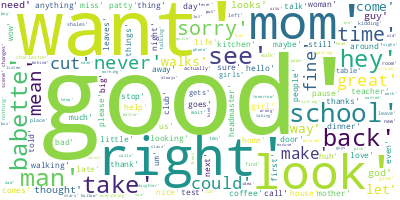

In [12]:
wordcloud.to_image()

Visualize the word cloud using wordcloud.to_image().

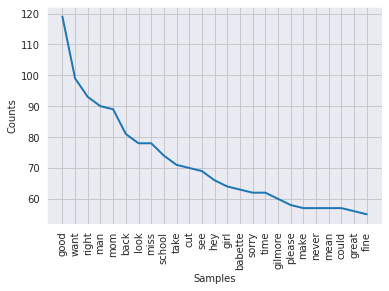

In [13]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(season_1)
nlp_words.plot(25);


The above code allows us to explore another method of visualization, a graph representing the frequency of words in a given season.

In [14]:
from collections import Counter
data_set1 = season_1
Counter = Counter(data_set1)

most_occur = Counter.most_common(50)
  
print(most_occur)


[('good', 119), ('want', 99), ('right', 93), ('man', 90), ('mom', 89), ('back', 81), ('look', 78), ('miss', 78), ('school', 74), ('take', 71), ('cut', 70), ('see', 69), ('hey', 66), ('girl', 64), ('babette', 63), ('sorry', 62), ('time', 62), ('gilmore', 60), ('please', 58), ('make', 57), ('never', 57), ('mean', 57), ('could', 57), ('great', 56), ('fine', 55), ('coffee', 51), ('guy', 51), ('need', 51), ('walks', 49), ('inn', 49), ('come', 49), ('let', 49), ('patty', 49), ('way', 48), ('thought', 48), ('headmaster', 48), ('day', 47), ('nice', 46), ('god', 46), ('looks', 46), ('goes', 45), ('teacher', 45), ('sure', 44), ('little', 44), ('house', 44), ('thank', 43), ('room', 42), ('test', 42), ('around', 41), ('2', 40)]


In the same vein, we can also obtain the words that occur the most in season 1 in a list. 

In [15]:
from collections import Counter
data_set2 = season_3
Counter = Counter(data_set2)

most_occur = Counter.most_common(50)
  
print(most_occur)

[('good', 118), ('right', 116), ('walks', 92), ('back', 90), ('time', 80), ('hey', 79), ('mom', 74), ('come', 71), ('cut', 70), ('see', 69), ('little', 62), ('great', 59), ('way', 58), ('want', 58), ('love', 54), ('mean', 53), ('wan', 52), ('make', 51), ('house', 51), ('fine', 50), ('dwight', 48), ('phone', 47), ('sure', 46), ('walk', 46), ('look', 46), ('talk', 46), ('nice', 46), ('could', 44), ('room', 43), ('man', 42), ('sorry', 42), ('thing', 39), ('please', 38), ('thank', 37), ('two', 37), ('even', 37), ('school', 35), ('place', 34), ('take', 34), ('let', 34), ('peyton', 34), ('another', 33), ('next', 33), ('talking', 32), ('things', 32), ('need', 32), ('people', 32), ('away', 32), ('boy', 32), ('day', 31)]


The words that occur the most in season 3.

In [16]:
li1 = season_1
li2 = season_3
 
wordsin1 = []
for element in li1:
    if element not in li2:
        wordsin1.append(element)
 


from collections import Counter
data_set = wordsin1
Counter = Counter(wordsin1)

most_occur = Counter.most_common(110)
  
print(most_occur)
#print(wordsin1)


[('test', 42), ('pan', 24), ('shales', 22), ('ca', 20), ('deer', 18), ('office', 16), ('cat', 16), ('risotto', 16), ('mary', 15), ('harp', 14), ('alright', 13), ('swans', 13), ('medina', 13), ('james', 12), ('peach', 11), ('tristin', 11), ('lucent', 11), ('sauce', 10), ('clothes', 10), ('golfing', 10), ('gloria', 10), ('salvador', 9), ('cart', 9), ('cinnamon', 9), ('coat', 8), ('sugar', 8), ('locker', 8), ('mick', 8), ('strawberries', 8), ('soup', 8), ('louise', 8), ('review', 8), ('shoe', 7), ('silence', 7), ('slams', 7), ('folder', 7), ('wake', 7), ('break', 7), ('rather', 7), ('fez', 7), ('swan', 7), ('sale', 7), ('smiles', 6), ('plaid', 6), ('monday', 6), ('drops', 6), ('grandparents', 6), ('known', 6), ('grandfather', 6), ('funeral', 6), ('closes', 6), ('hanlin', 6), ('dsl', 6), ('frog', 6), ('sport', 6), ('jackie', 6), ('jessica', 6), ('20', 6), ('jeez', 6), ('fresh', 6), ('vous', 6), ('clams', 6), ('watches', 5), ('hmm', 5), ('strawberry', 5), ('100', 5), ('wo', 5), ('mark', 5),

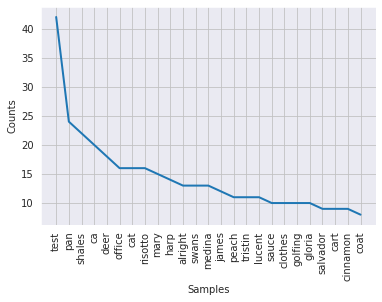

   test     pan  shales      ca    deer  office     cat risotto    mary    harp 
     42      24      22      20      18      16      16      16      15      14 


In [18]:
sns.set_style('darkgrid')
w1_words=nltk.FreqDist(wordsin1)
w1_words.plot(25);

w1_words.tabulate(10)

The above code allows us to obtain the words that occur in season 1 and not season 3.

In [17]:
li1 = season_1
li2 = season_3
 
wordsin3 = []
for element in li2:
    if element not in li1:
        wordsin3.append(element)
 


from collections import Counter
data_set = wordsin3
Counter = Counter(wordsin3)

most_occur = Counter.most_common(100)
  
print(most_occur)
#print(wordsin3)


[('dwight', 48), ('peyton', 34), ('shane', 23), ('auction', 23), ('marie', 18), ('bowie', 13), ('natalie', 12), ('soda', 11), ('bleach', 11), ('romaine', 10), ('practice', 10), ('kissed', 9), ('success', 9), ('bartender', 9), ('toy', 8), ('kiss', 8), ('tables', 8), ('dollars', 8), ('cheese', 8), ('vin', 8), ('diesel', 8), ('oasis', 8), ('punchline', 8), ('yellow', 8), ('auctioneer', 8), ('tom', 7), ('pork', 7), ('residence', 7), ('hillary', 7), ('terrific', 7), ('dye', 7), ('paddle', 7), ('peter', 7), ('middle', 6), ('hay', 6), ('twelve', 6), ('famous', 6), ('connecticut', 6), ('drawers', 6), ('springsteen', 6), ('zoltan', 6), ('favor', 6), ('deb', 6), ('beenie', 6), ('sanders', 6), ('concert', 6), ('cutler', 6), ('original', 5), ('stomach', 5), ('washington', 5), ('butch', 5), ('blonde', 5), ('pretend', 5), ('cow', 5), ('wing', 5), ('subject', 5), ('elder', 5), ('scones', 5), ('mimi', 5), ('geez', 5), ('statement', 5), ('jobs', 5), ('clinton', 5), ('samuels', 5), ('applications', 5), 

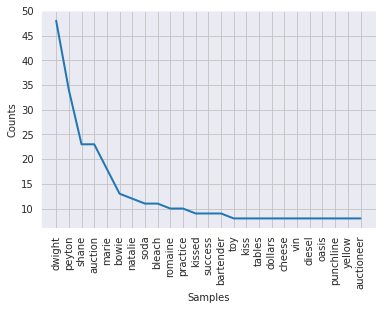

 dwight  peyton   shane auction   marie   bowie natalie    soda  bleach romaine 
     48      34      23      23      18      13      12      11      11      10 


In [19]:
sns.set_style('darkgrid')
w3_words=nltk.FreqDist(wordsin3)
w3_words.plot(25);

w3_words.tabulate(10)


words occurring in season 3 and not season 1

Resources